In [1]:
from skmultiflow.data import LEDGeneratorDrift, ConceptDriftStream,\
                             RandomRBFGeneratorDrift, AGRAWALGenerator, HyperplaneGenerator
import pandas as pd

# AGRAWAL

In [2]:
gen = ConceptDriftStream(stream=AGRAWALGenerator(balance_classes=True, classification_function=0,
                         perturbation=0.2, random_state=42),
                         drift_stream=AGRAWALGenerator(balance_classes=False, classification_function=2,
                         perturbation=0.7, random_state=42),
                         random_state=42, position=1000)
X,y = gen.next_sample(40000)
df = pd.DataFrame(X)
df['class'] = y

In [3]:
df.to_csv('../data/agrawal/data.csv', index=False)
df.to_csv('../data/agrawal_ninc/data.csv', index=False)

# HYPERPLANE

In [4]:
gen = ConceptDriftStream(stream=HyperplaneGenerator(random_state=42, n_features=5, n_drift_features=1,
                                                    mag_change=0.1, noise_percentage=0.25, sigma_percentage=0.1),
                         drift_stream=HyperplaneGenerator(random_state=42, n_features=5, n_drift_features=3,
                                                    mag_change=0.7, noise_percentage=0.05, sigma_percentage=0.1),
                         random_state=42, position=700)
X,y = gen.next_sample(40000)
df = pd.DataFrame(X)
df['class'] = y

In [5]:
df.to_csv('../data/hyper/data.csv', index=False)
df.to_csv('../data/hyper_ninc/data.csv', index=False)

# RBF

In [6]:
gen = RandomRBFGeneratorDrift(model_random_state=42, sample_random_state=42, n_classes=2, n_features=5,
                              change_speed=0.1,
                              n_centroids=10, num_drift_centroids=5)
X,y = gen.next_sample(40000)
df = pd.DataFrame(X)
df['class'] = y

In [7]:
df.to_csv('../data/rbf/data.csv', index=False)
df.to_csv('../data/rbf_ninc/data.csv', index=False)

### Test distribution between classifiers

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y)

In [10]:
rf = RandomForestClassifier()
svm = SVC()
rf.fit(xtrain, ytrain)
svm.fit(xtrain, ytrain)

SVC()

In [11]:
cvrf = cross_val_score(rf, xtest, ytest, cv=10, n_jobs=-1)
cvsvm = cross_val_score(svm, xtest, ytest, cv=10, n_jobs=-1)

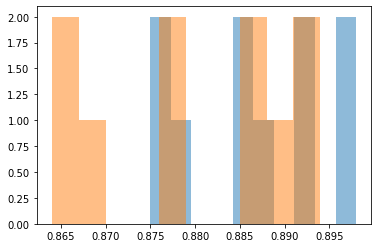

In [12]:
import matplotlib.pyplot as plt
plt.hist(cvrf, alpha=.5);
plt.hist(cvsvm, alpha=.5);

In [13]:
cvrf

array([0.875, 0.876, 0.897, 0.886, 0.885, 0.887, 0.892, 0.898, 0.893,
       0.878])

In [14]:
cvsvm

array([0.867, 0.864, 0.886, 0.877, 0.876, 0.89 , 0.894, 0.885, 0.892,
       0.865])